# Demo of Build and Parameterize tools from SwiftPol

- Build a short linear co-polymer chain (PLGA)
- Use [Espaloma Charge](https://github.com/choderalab/espaloma) and [NAGL](https://github.com/openforcefield/openff-nagl) to assign charges to the SwiftPol chain, and compare values
- Use a Ring Opening Polymerisation scheme to build a PLGA chain
- Create a small SwiftPol PLGA ensemble, assign partial charges to the chain, and inspect the first chain in the system
- Solvate the PLGA ensemble with water, NaCl and 0.5% residual monomer
- Test the effect of a uniform and normal distribution on the chain length and % lactide of a SwiftPol PLGA ensemble
- Build a commercially available PLGA ensemble and solvate 

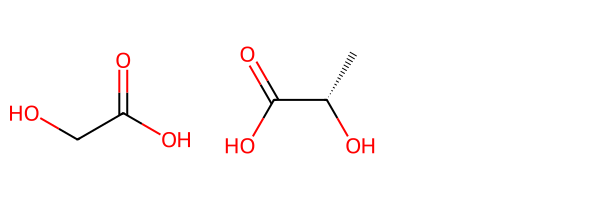

In [1]:
# Import monomers to build PLGA and visualise using RDkit
from rdkit import Chem
from rdkit import RDLogger 
RDLogger.DisableLog('rdApp.*')   
monomer_smiles = ['OC(=O)CO', 'C[C@@H](C(=O)[OH])O']
glycolic = Chem.MolFromSmiles(monomer_smiles[0])
lactate = Chem.MolFromSmiles(monomer_smiles[1])
Chem.Draw.MolsToGridImage([glycolic,lactate])

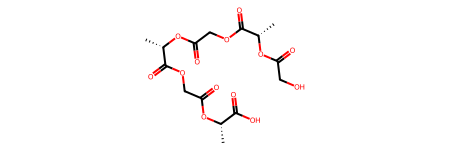

In [2]:
# Build a short linear chain using Swiftpol
from swiftpol import build
from rdkit.Chem import AllChem

monomer_list = ['OC(=O)COI', 'C[C@@H](C(=O)[OH])OI']
reaction = AllChem.ReactionFromSmarts('[C:1][OH:2].[I:4][O:5][C:6]>>[C:1][O:2][C:6].[O:5][I:4]')
chain = build.build_polymer(sequence = 'ABABAB',
                            monomer_list= monomer_list,
                            reaction = reaction)
chain

In [3]:
# Assign charges to the chain using Espaloma Charge
from swiftpol import parameterize
import warnings
warnings.filterwarnings('ignore')
parameterize.charge_polymer(polymer = chain, charge_scheme='espaloma')

array([ 7.77123153e-01, -4.94031489e-01,  9.09776613e-02, -7.33221881e-04,
       -5.82999945e-01, -4.66306925e-01,  7.54409969e-01,  9.48170722e-02,
       -5.54363906e-01, -4.96664464e-01, -1.34297699e-01,  7.77123094e-01,
       -7.33221881e-04, -5.82999945e-01, -4.66306925e-01,  7.54409969e-01,
        9.66779441e-02, -5.54363906e-01, -4.89754051e-01, -1.34297684e-01,
        7.82715082e-01, -5.43020427e-01, -1.82934338e-03, -6.75435722e-01,
       -1.31069824e-01,  8.01335156e-01, -5.08667111e-01, -6.55341148e-01,
        1.16298988e-01,  1.24006636e-01,  1.24006636e-01,  1.13536134e-01,
        7.87098333e-02,  7.87098333e-02,  7.87098333e-02,  1.24006636e-01,
        1.24006636e-01,  1.13536134e-01,  7.87098333e-02,  7.87098333e-02,
        7.87098333e-02,  9.41647366e-02,  9.41647366e-02,  4.05642599e-01,
        7.87098259e-02,  7.87098259e-02,  7.87098259e-02,  4.01869804e-01],
      dtype=float32)

In [4]:
# Assign charges to the chain using NAGL
from swiftpol import parameterize
import warnings
warnings.filterwarnings('ignore')
parameterize.charge_polymer(polymer = chain, charge_scheme='NAGL')

array([ 0.64762633, -0.43224437,  0.10760575,  0.08914204, -0.50493378,
       -0.42829854,  0.64226108,  0.10114308, -0.50591011, -0.43019832,
       -0.109393  ,  0.6487314 ,  0.08891593, -0.50707717, -0.42829854,
        0.64145051,  0.10263153, -0.50591011, -0.4322213 , -0.1102319 ,
        0.63753926, -0.49706222,  0.09857142, -0.57114364, -0.11229469,
        0.63341593, -0.52068234, -0.60180391,  0.10720658,  0.09341059,
        0.09341059,  0.10609206,  0.06287562,  0.06287562,  0.06287562,
        0.09341059,  0.09341059,  0.10524487,  0.06287562,  0.06287562,
        0.06287562,  0.06679461,  0.06679461,  0.41464232,  0.06354058,
        0.06354058,  0.06354058,  0.4503768 ])

Text(0, 0.5, 'Espaloma')

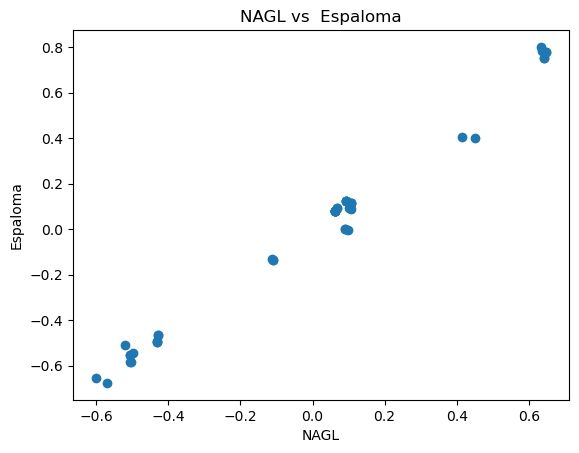

In [5]:
# Compare charges
import matplotlib.pyplot as plt
plt.scatter(parameterize.charge_polymer(polymer = chain, charge_scheme='NAGL'), 
            parameterize.charge_polymer(polymer = chain, charge_scheme='espaloma'))
plt.title('NAGL vs  Espaloma')
plt.xlabel('NAGL')
plt.ylabel('Espaloma')

In [6]:
# Build a PLGA system
from rdkit.Chem import AllChem
polymer = build.polymer_system(monomer_list=['O[C@H](C)C(=O)O[I]','OCC(=O)O[I]'], 
                                reaction = AllChem.ReactionFromSmarts('[HO:1][C:2].[O:3][C:5]=[O:6]>>[C:2][O:1][C:5]=[O:6].[O:3]'),
                                length_target=10,
                                num_chains = 5,
                                blockiness_target=1.0,
                                perc_A_target=50, 
                                copolymer=True)
polymer

System built!, size = 5


In [7]:
# Calculate the polydispersity index of the PLGA system
PDI = build.PDI(polymer.chain_rdkit)[0]
print('PDI = ', PDI)

PDI =  5.0


In [8]:
# Calculate the blockiness of the sequence
from swiftpol import demo
mean_blockiness, G_block_length, L_block_length = demo.blockiness_PLGA(sequence='LLGG')
print("Average chain blockiness =", round(mean_blockiness,1))
print("G Block length =", round(G_block_length))
print("L Block length =", round(L_block_length))

Average chain blockiness = 1.0
G Block length = 2
L Block length = 2


## Ensemble Build

In [9]:
# Create a new system
x = build.polymer_system(monomer_list=['O[C@H](C)C(=O)O[I]','OCC(=O)O[I]'], 
                         reaction = AllChem.ReactionFromSmarts('[HO:1][C:2].[O:3][C:5]=[O:6]>>[C:2][O:1][C:5]=[O:6].[O:3]'),
                         length_target=20,
                         num_chains = 1,
                         blockiness_target=1.0,
                         perc_A_target=75, 
                         copolymer=True)
print('Actual lactide conc. = ', round(x.A_actual,2))
print('length range = ', x.min_length, '-', x.max_length)
print("Polydispersity Index = ", round(x.PDI,3))
print("Average chain blockiness =", x.mean_blockiness)

System built!, size = 1
Actual lactide conc. =  80.0
length range =  20 - 20
Polydispersity Index =  1.0
Average chain blockiness = 1.0


In [10]:
# Inspect the first chain in our system
x.generate_conformers()
x.chains[0].visualize(backend='nglview')

NGLWidget()

In [11]:
# Charge the PLGA system using NAGL 
x.charge_system()

In [12]:
# Create a solvated system, ready to export into GROMACS or OpenMM
# Including 0.05% w/w residual monomer
from openff.units import unit
solv_system = x.solvate_system(resid_monomer = 0.5, salt_concentration = 0.1 * unit.mole / unit.liter)
print('residual_monomer =', round(x.residual_monomer, 2), '%')

residual_monomer = 0.5 %


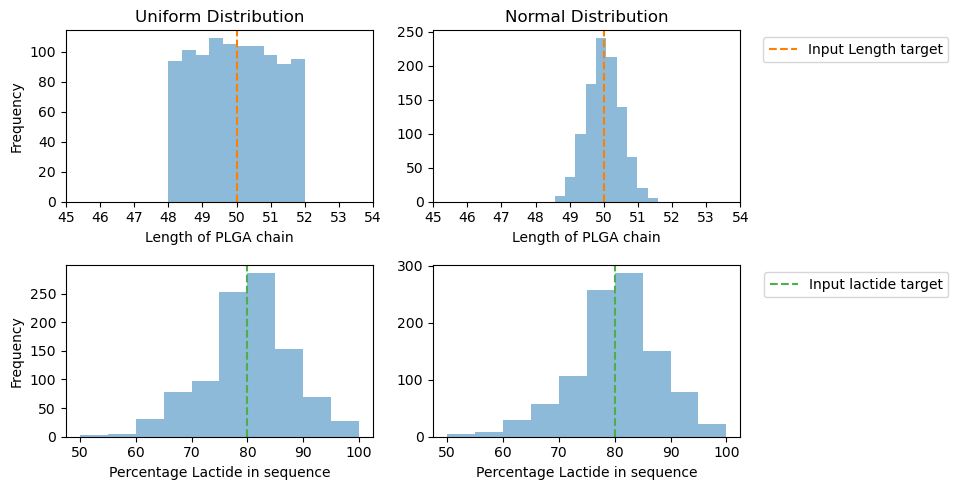

In [13]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
# Effect of a normal distribution
perc_lactide_target, length_target, num_chains = 80, 50, 1000 # specify input parameters

# Generate lengths and sequences without a normal distribution applied
lengths_1 = []
lac_1 = []
chains_1 = []
for i in range(num_chains):
    length_actual = np.random.uniform(int(round(length_target*0.95)),int(round(length_target*1.05)))
    lengths_1.append(length_actual)
    sequence = reduce(lambda x, y: x + y, np.random.choice(['LL', 'GG'], size=(int(length_actual/2),), p=[perc_lactide_target/100,1-(perc_lactide_target/100)]))
    actual_lac = sequence.count('L')
    lac_1.append((actual_lac/len(sequence)*100))
    chains_1.append(demo.build_PLGA_ring(sequence=sequence, terminal ='hydroxyl')[0])


# Generate lengths and sequences with a normal distribution applied
lengths_2 = []
lac_2 = []
mw_list2 = []
chains_2 = []
for i in range(num_chains):
    length_actual = np.random.normal(length_target, 0.5)
    lengths_2.append(length_actual)
    sequence = reduce(lambda x, y: x + y, np.random.choice(['LL', 'GG'], size=(int(length_actual/2),), p=[perc_lactide_target/100,1-(perc_lactide_target/100)]))
    actual_lac = sequence.count('L')
    lac_2.append((actual_lac/len(sequence)*100))
    chains_2.append(demo.build_PLGA_ring(sequence=sequence, terminal ='hydroxyl')[0])

# Plot
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
axs[0,0].hist(lengths_1, rwidth=1, alpha=0.5)
axs[0,0].set_xticks(range(int(round(length_target*0.9)),int(round(length_target*1.1))))
axs[0,0].set_xlabel('Length of PLGA chain')
axs[0,0].set_ylabel('Frequency')
axs[0,0].axvline(length_target, color='#ff7f00', linestyle='--', label='Input Length target')
axs[0,0].set_title('Uniform Distribution')

axs[0,1].hist(lengths_2, rwidth=1, alpha=0.5)
axs[0,1].set_xticks(range(int(round(length_target*0.9)),int(round(length_target*1.1))))
axs[0,1].set_xlabel('Length of PLGA chain')
axs[0,1].axvline(length_target, color='#ff7f00', linestyle='--', label='Input Length target')
axs[0,1].set_title('Normal Distribution')
axs[0,1].legend(bbox_to_anchor=(1.7, 1.0))

axs[1,0].hist(lac_1, alpha=0.5)
axs[1,0].set_xlabel('Percentage Lactide in sequence')
axs[1,0].set_ylabel('Frequency')
axs[1,0].axvline(perc_lactide_target, color='#4daf4a', linestyle='--', label='Input lactide target')

axs[1,1].hist(lac_2, alpha=0.5)
axs[1,1].set_xlabel('Percentage Lactide in sequence')
axs[1,1].axvline(perc_lactide_target, color='#4daf4a', linestyle='--', label='Input lactide target')

plt.legend(bbox_to_anchor=(1.7, 1.0))
plt.tight_layout()
plt.show()

## Resomer® LG 756 S

Building a [commerically available PLGA](https://www.sigmaaldrich.com/GB/en/product/aldrich/719927) molecule with input specification based on quality assurance parameters

Blockiness value from literature:
Sun J, et al. 2022 | Characterization of commercial PLGAs by NMR spectroscopy. Drug Deliv Transl Res. 


In [14]:
# Create a system
import time
from swiftpol import demo
start = time.process_time()
x = demo.PLGA_system(75, 50, 1.7, 'ester', 3)
end = time.process_time()
print('Actual lactide conc. = ', round(x.lactide_actual,2))
print('length = ', x.min_length)
print("Polydispersity Index = ", round(x.PDI,3))
print("Average chain blockiness =", round(x.mean_blockiness,1))
print("Average Molecular Weight =", x.mol_weight_average)
print("G Block length =", round(x.G_block_length))
print("L Block length =", round(x.L_block_length))
#Print time taken to build chain
time_elapsed = end - start
print('Build time -', round(time_elapsed,3), 's')

System built!, size = 3
Actual lactide conc. =  79.17
length =  48
Polydispersity Index =  3.0
Average chain blockiness = 1.7
Average Molecular Weight = 3348.88
G Block length = 3
L Block length = 10
Build time - 0.785 s


In [15]:
# Generate charges and conformers
x.charge_system()
x.generate_conformers()

In [22]:
# Solvate PLGA ensemble - including residual monomer and NaCl
from openff.units import unit
solv = x.solvate_system(resid_monomer = 0.5, salt_concentration = 0.1 * unit.mole / unit.liter)

In [24]:
# Visualize the solvated ensemble with NGLView
solv.visualize()

NGLWidget()